# Merge Sustainalytics-BS and Tayla's Pollution Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import and Prepare Data

#### Mina's Sustainalytics-BS Merged Data

In [2]:
sa_bs_columns = ["LPERMNO", "total_esg_score", "environment_score", "evtdate", "sell", "amountE", "icpsr_id"]

In [3]:
sa_bs = pd.read_csv("../data/minas_esg/sustainalytics_bs_merge.csv", encoding="latin-1")[sa_bs_columns]\
        .dropna(subset=["icpsr_id", "amountE"])
sa_bs

,LPERMNO,total_esg_score,environment_score,evtdate,sell,amountE,icpsr_id
2,21020,55.29,44.32,2019-06-24,1.0,1000.0,20748.0
6,21020,55.24,44.19,2020-06-11,0.0,1000.0,21128.0
7,21020,55.24,44.19,2020-07-02,1.0,8000.5,14852.0
10,21020,55.24,44.19,2020-06-09,0.0,1000.0,21128.0
11,21020,55.24,44.19,2020-06-30,0.0,8000.5,14852.0
...,...,...,...,...,...,...,...
54200,14406,50.26,44.85,2020-04-02,0.0,15000.0,21751.0
54201,14406,50.26,44.85,2020-04-03,0.0,1000.0,21751.0
54206,14297,55.82,50.00,2016-12-06,1.0,1000.0,21165.0
54208,14297,57.45,54.84,2017-12-11,0.0,1000.0,15446.0


#### Calculate the average ESG scores weighted by absolute transaction amount
Note: this does not account for buy vs sell. 

In [4]:
weighted_total_esg = sa_bs.groupby("icpsr_id")[["amountE", "total_esg_score"]].apply(lambda x: sum(x["amountE"] * x["total_esg_score"]) / sum(x["amountE"]))

In [5]:
sa_bs_env = sa_bs.dropna(subset="environment_score")
weighted_env_esg = sa_bs_env.groupby("icpsr_id")[["amountE", "environment_score"]].apply(lambda x: sum(x["amountE"] * x["environment_score"]) / sum(x["amountE"]))

In [6]:
weigted_esg = pd.DataFrame({"total_esg_score": weighted_total_esg, "environment_score": weighted_env_esg}).reset_index()
weigted_esg 

,icpsr_id,total_esg_score,environment_score
0,14009.0,57.395396,56.302638
1,14503.0,61.319344,60.391949
2,14657.0,71.822024,80.439376
3,14852.0,57.436103,59.786064
4,14854.0,62.990380,62.513241
...,...,...,...
219,41706.0,50.241729,55.447933
220,49300.0,55.431393,58.318163
221,49703.0,73.542892,69.689336
222,49706.0,57.240000,49.000000


#### Talya's Pollution Data

In [7]:
pollution = pd.read_csv("../data/EmissionsProEnvVotes.csv")[["icpsr", "everHighSO2", "everHighCO2", "everHighNOx"]]\
            .drop_duplicates().dropna().reset_index(drop=True)
pollution

,icpsr,everHighSO2,everHighCO2,everHighNOx
0,14651,1.0,1.0,1.0
1,15015,0.0,0.0,0.0
2,15634,1.0,0.0,1.0
3,20105,0.0,1.0,0.0
4,20106,0.0,1.0,0.0
...,...,...,...,...
223,41308,1.0,0.0,0.0
224,41500,0.0,0.0,0.0
225,41503,1.0,1.0,1.0
226,41504,1.0,1.0,1.0


## Merge Data

In [8]:
sa_bs_pollution = weigted_esg.merge(pollution, left_on="icpsr_id", right_on="icpsr", how="inner")
sa_bs_pollution[:5]

,icpsr_id,total_esg_score,environment_score,icpsr,everHighSO2,everHighCO2,everHighNOx
0,15015.0,58.667483,56.654585,15015,0.0,0.0,0.0
1,20305.0,64.177283,65.485841,20305,0.0,0.0,0.0
2,20316.0,49.610000,48.490000,20316,1.0,1.0,1.0
3,20325.0,59.000000,75.000000,20325,0.0,0.0,0.0
4,20342.0,54.874703,50.625334,20342,0.0,0.0,0.0


## Naive Visualizations

### Total ESG Scores vs Pollution Experience

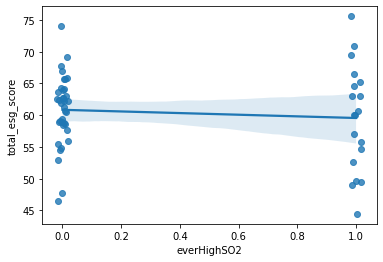

In [9]:
sns.regplot(data=sa_bs_pollution, x="everHighSO2", y="total_esg_score", x_jitter=0.02);

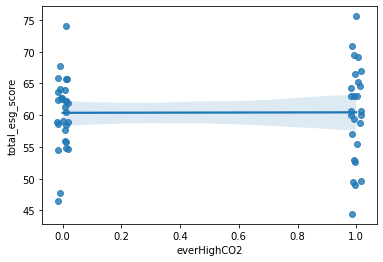

In [10]:
sns.regplot(data=sa_bs_pollution, x="everHighCO2", y="total_esg_score", x_jitter=0.02);

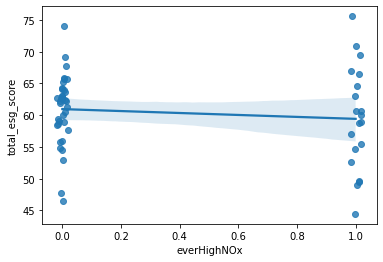

In [11]:
sns.regplot(data=sa_bs_pollution, x="everHighNOx", y="total_esg_score", x_jitter=0.02);

### Environment Scores vs Pollution Experience

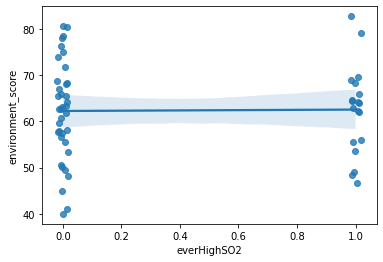

In [12]:
sns.regplot(data=sa_bs_pollution, x="everHighSO2", y="environment_score", x_jitter=0.02);

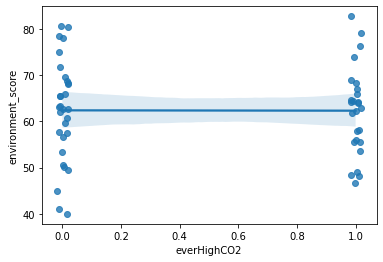

In [13]:
sns.regplot(data=sa_bs_pollution, x="everHighCO2", y="environment_score", x_jitter=0.02);

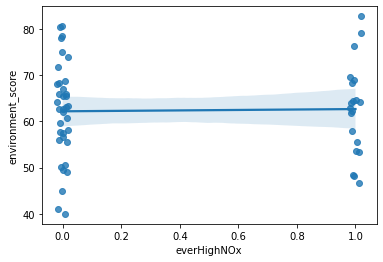

In [14]:
sns.regplot(data=sa_bs_pollution, x="everHighNOx", y="environment_score", x_jitter=0.02);

None of the above show any significant differences between politicians who experienced pollution and those did not. 

Potential improvements: 
- Account for buy/sell when computing weighted average
- Only include extreme ESG scores (because it's hard for typical people to see that a company with 70 ESG score is a more environmental responsible firm than a 69 ESG score one)